In [ ]:
pip install statsmodels=='0.14.0'

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd

In [ ]:
tmdb = pd.read_csv('tmdb_5000_movies.csv')
tmdb.head()

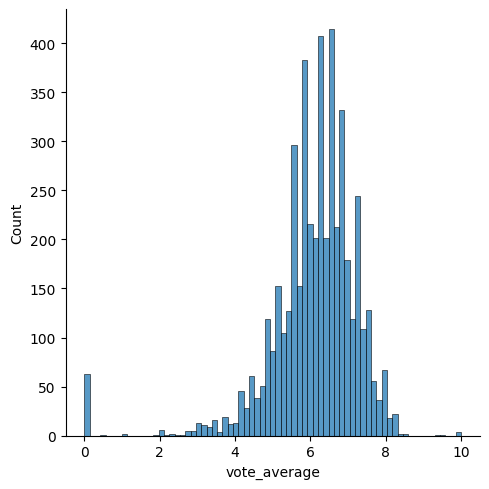

In [ ]:
import seaborn as sns

sns.displot(tmdb['vote_average'])

In [ ]:
notas = pd.read_csv('ratings.csv')
notas.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [ ]:
media_filmes = notas.groupby('movieId')['rating'].mean()
media_filmes

movieId
1         3.920930
2         3.431818
3         3.259615
4         2.357143
5         3.071429
            ...   
193581    4.000000
193583    3.500000
193585    3.500000
193587    3.500000
193609    4.000000
Name: rating, Length: 9724, dtype: float64

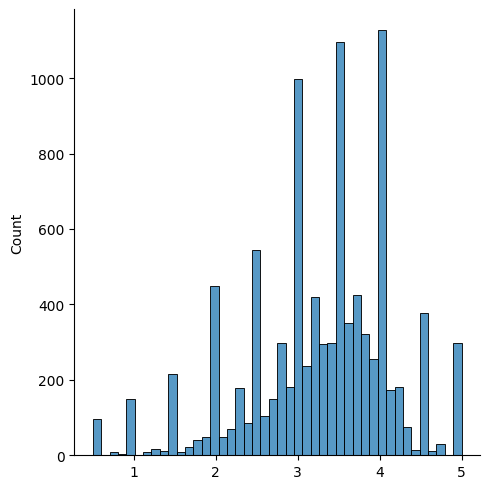

In [ ]:
sns.displot(media_filmes.values)

In [ ]:
n_votos = notas.groupby('movieId').count()
n_votos

,userId,rating,timestamp
movieId,,,
1,215,215,215
2,110,110,110
3,52,52,52
4,7,7,7
5,49,49,49
...,...,...,...
193581,1,1,1
193583,1,1,1
193585,1,1,1


In [ ]:
filmes_10votos = n_votos.query('rating >=10').index
filmes_10votos

Int64Index([     1,      2,      3,      5,      6,      7,      9,     10,
                11,     12,
            ...
            166461, 166528, 166643, 168250, 168252, 174055, 176371, 177765,
            179819, 187593],
           dtype='int64', name='movieId', length=2269)

In [ ]:
media_filmes_10votos = media_filmes.loc[filmes_10votos]
media_filmes_10votos

movieId
1         3.920930
2         3.431818
3         3.259615
5         3.071429
6         3.946078
            ...   
174055    3.423077
176371    3.805556
177765    3.538462
179819    3.125000
187593    3.875000
Name: rating, Length: 2269, dtype: float64

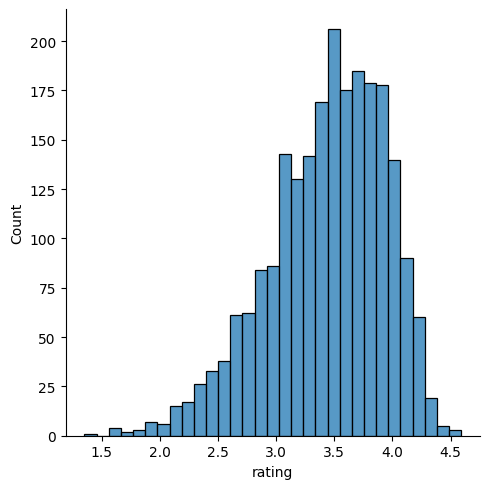

In [ ]:
sns.displot(media_filmes_10votos)

<Axes: xlabel='rating'>

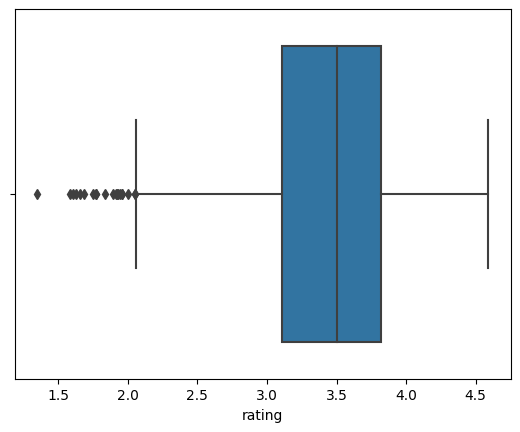

In [ ]:
sns.boxplot(x=media_filmes_10votos)